<a href="https://colab.research.google.com/github/yoshighosh/OCR-Testing/blob/main/OCR_Prototypes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Testing Tesseract OCR Models

**Steps:**
- Load in image file
- Preprocess using OpenCV
- 

# Loading in the Image file

Use OpenCV to load in an image


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow 

paths = ['/content/drive/MyDrive/Aroshi_highSchool/SEAP vounteer/image files/t1.tif', '/content/drive/MyDrive/Aroshi_highSchool/SEAP vounteer/image files/t2.tif', '/content/drive/MyDrive/Aroshi_highSchool/SEAP vounteer/image files/t5.tif', '/content/drive/MyDrive/Aroshi_highSchool/SEAP vounteer/image files/New Image.jpg', '/content/drive/MyDrive/Aroshi_highSchool/SEAP vounteer/image files/Picture_003.jpg', '/content/drive/MyDrive/Aroshi_highSchool/SEAP vounteer/image files/Picture_010.tif', '/content/drive/MyDrive/Aroshi_highSchool/SEAP vounteer/image files/Picture_025.tif', '/content/drive/MyDrive/Aroshi_highSchool/SEAP vounteer/image files/Picture_029.tif']

img = cv2.imread('/content/drive/MyDrive/Aroshi_highSchool/SEAP vounteer/image files/Picture_003.jpg')

# consider data types: pdf, pptx, word docs, 


# Different Preprocessing functions

Methods for preprocessing the image before running it through the OCR

In [ ]:
# get grayscale image, good for getting rid of color issues
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal, makes image clearer
def remove_noise(image):
    return cv2.medianBlur(image,5)
 
#thresholding, removes extra marks (lines, smudges, etc)
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation, bolds text to make it easier to read
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)
    
    
#erosion, shrinks the edges to make text thinner
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection, reverses color layout, not that useful
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction, corrects angled writing, good for handwriting??
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching, useful for finding specific parts of a document (if looking for specific symbol or marker)
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED) 

# Testing the preprocessing methods

sample test of all the methods, can skip running later 

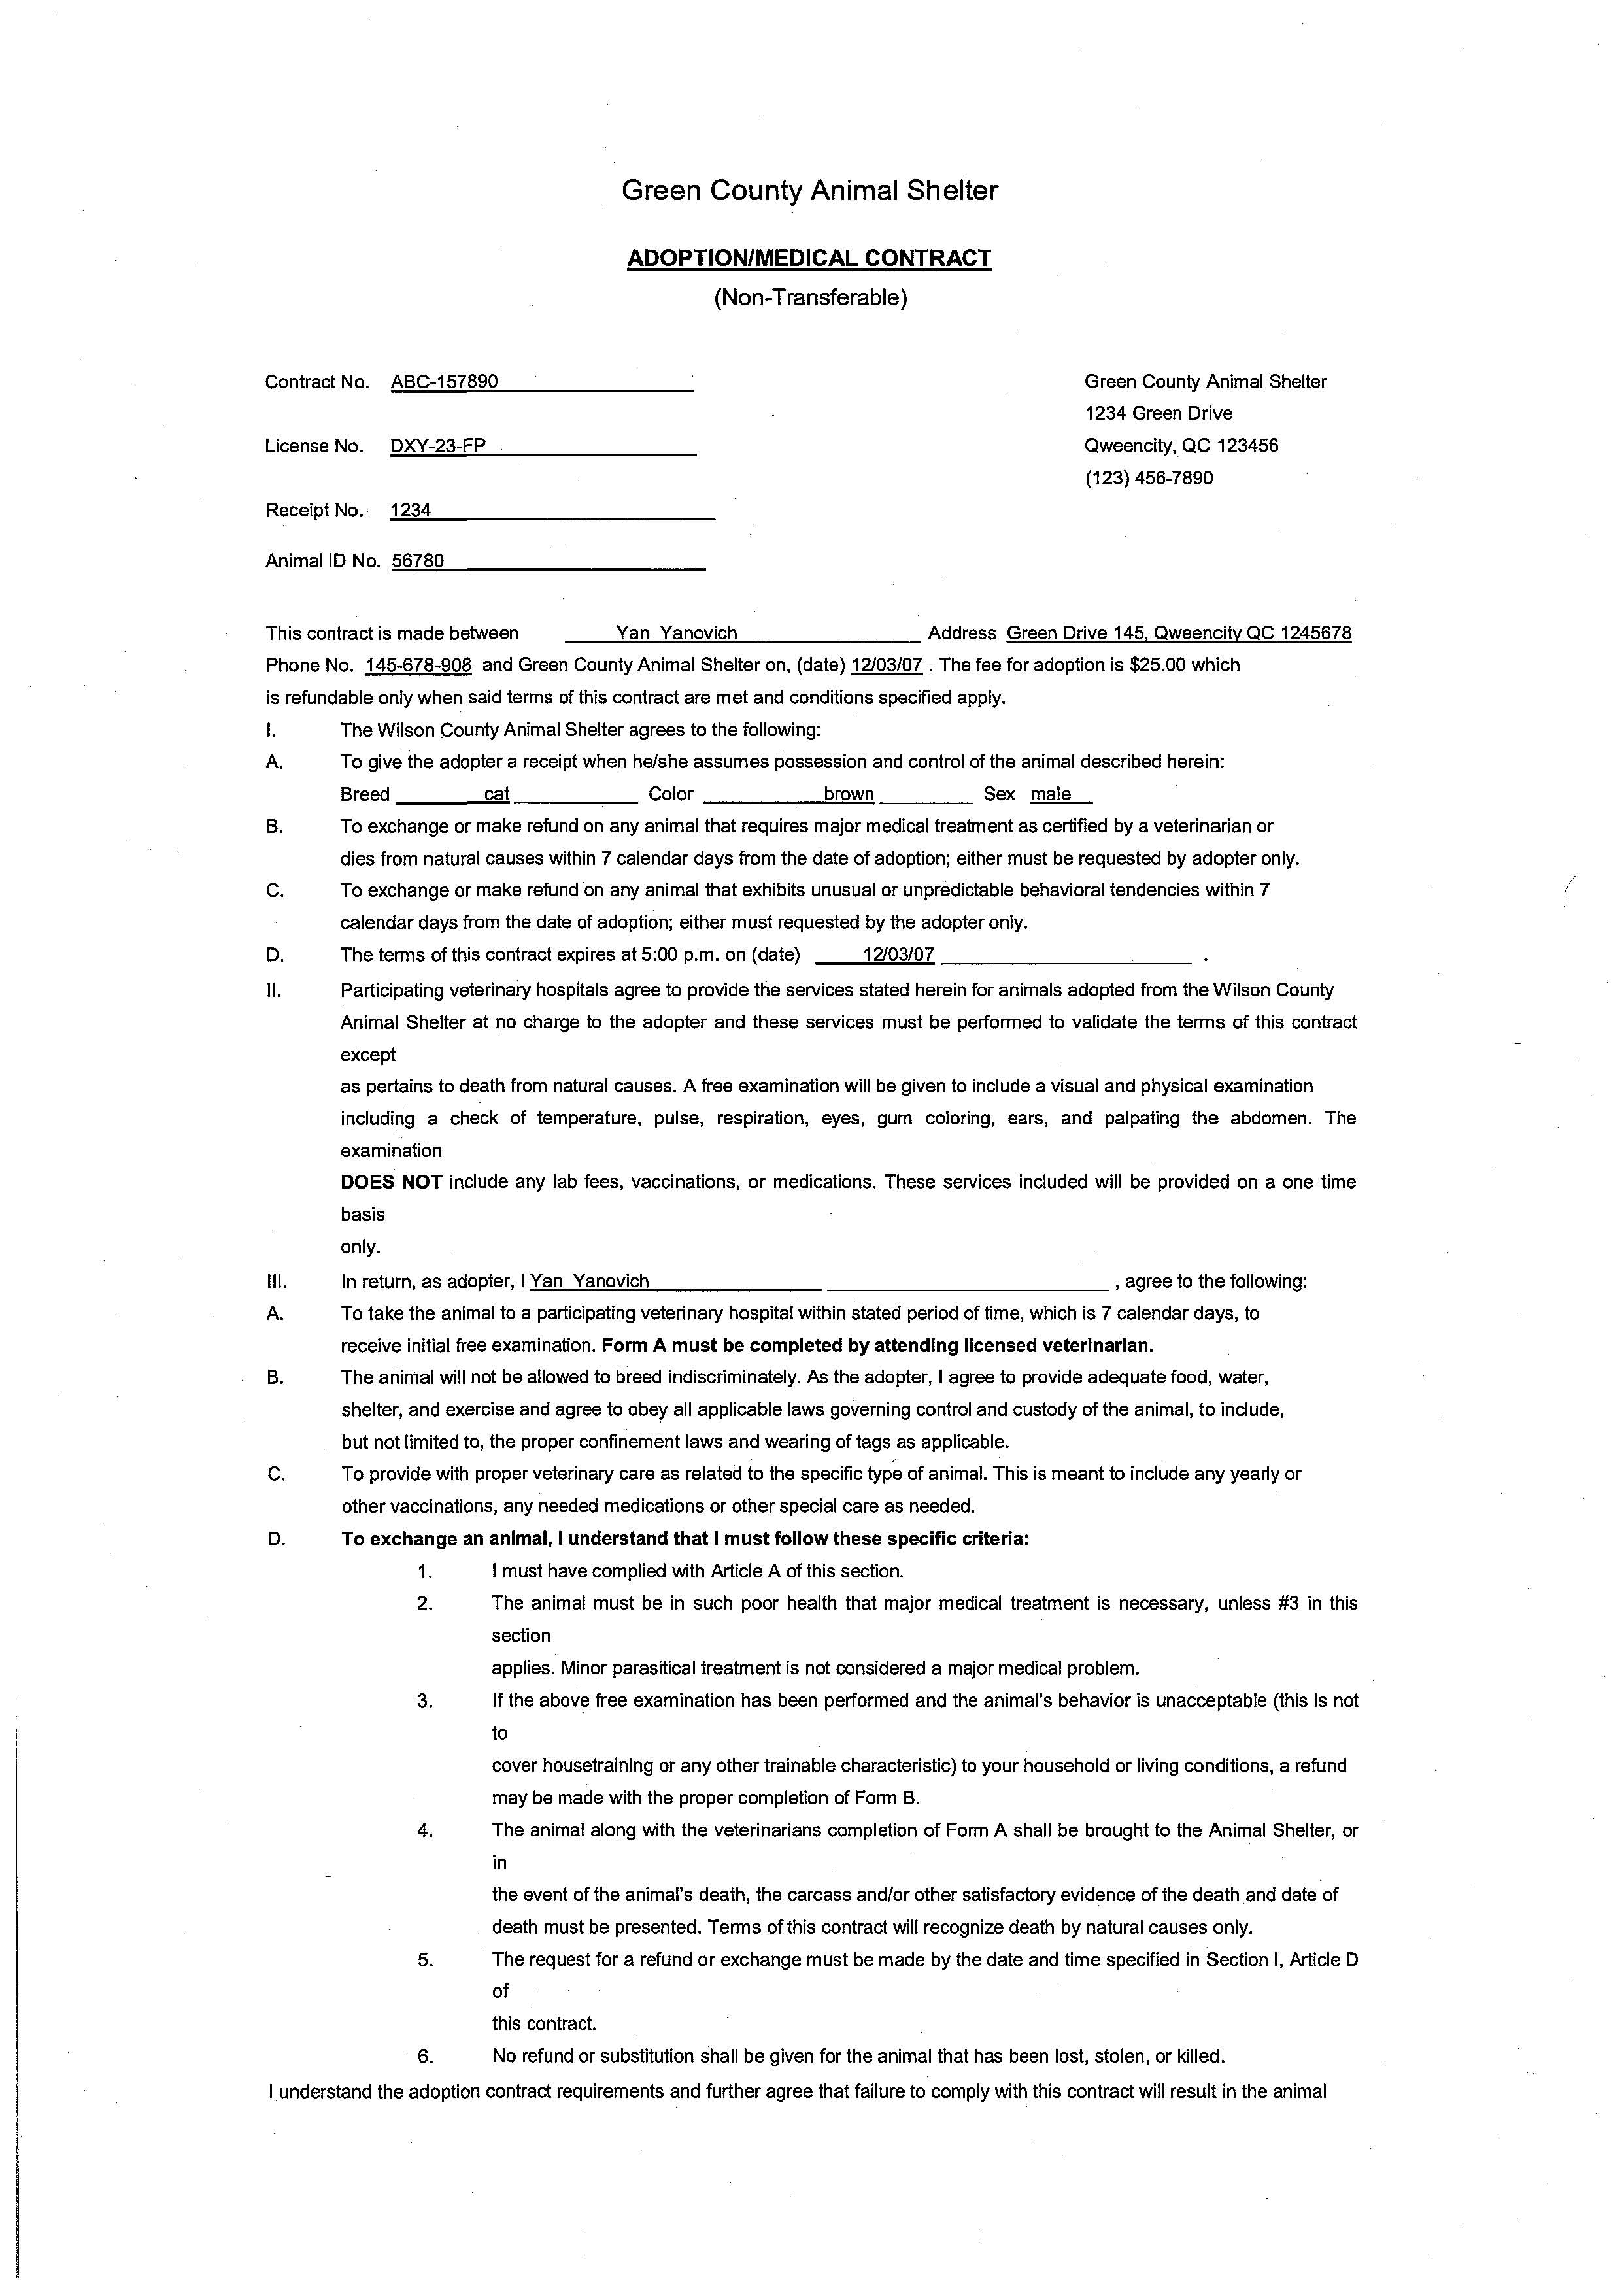

In [ ]:
grayscale = get_grayscale(img)
threshold = thresholding(grayscale)
dilated = dilate(grayscale)
eroded = erode(grayscale)
dil_ero = opening(grayscale)
skew = deskew(grayscale)


cv2_imshow(img)
#cv2_imshow(grayscale)
#cv2_imshow(threshold)
#cv2_imshow(dil_ero)
#cv2_imshow(dilated)
#cv2_imshow(eroded)
#cv2_imshow(skew)

# Installing tesseract

Install and import tesseract libraries

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 39 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (4,495 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl

In [ ]:
import pytesseract
from pytesseract import Output

# Boxing Words

Test tesseract ability to identify words by adding boxes

In [ ]:
d = pytesseract.image_to_data(grayscale, output_type=Output.DICT)
# print(d.keys()) # see keys to reference info about the boxes

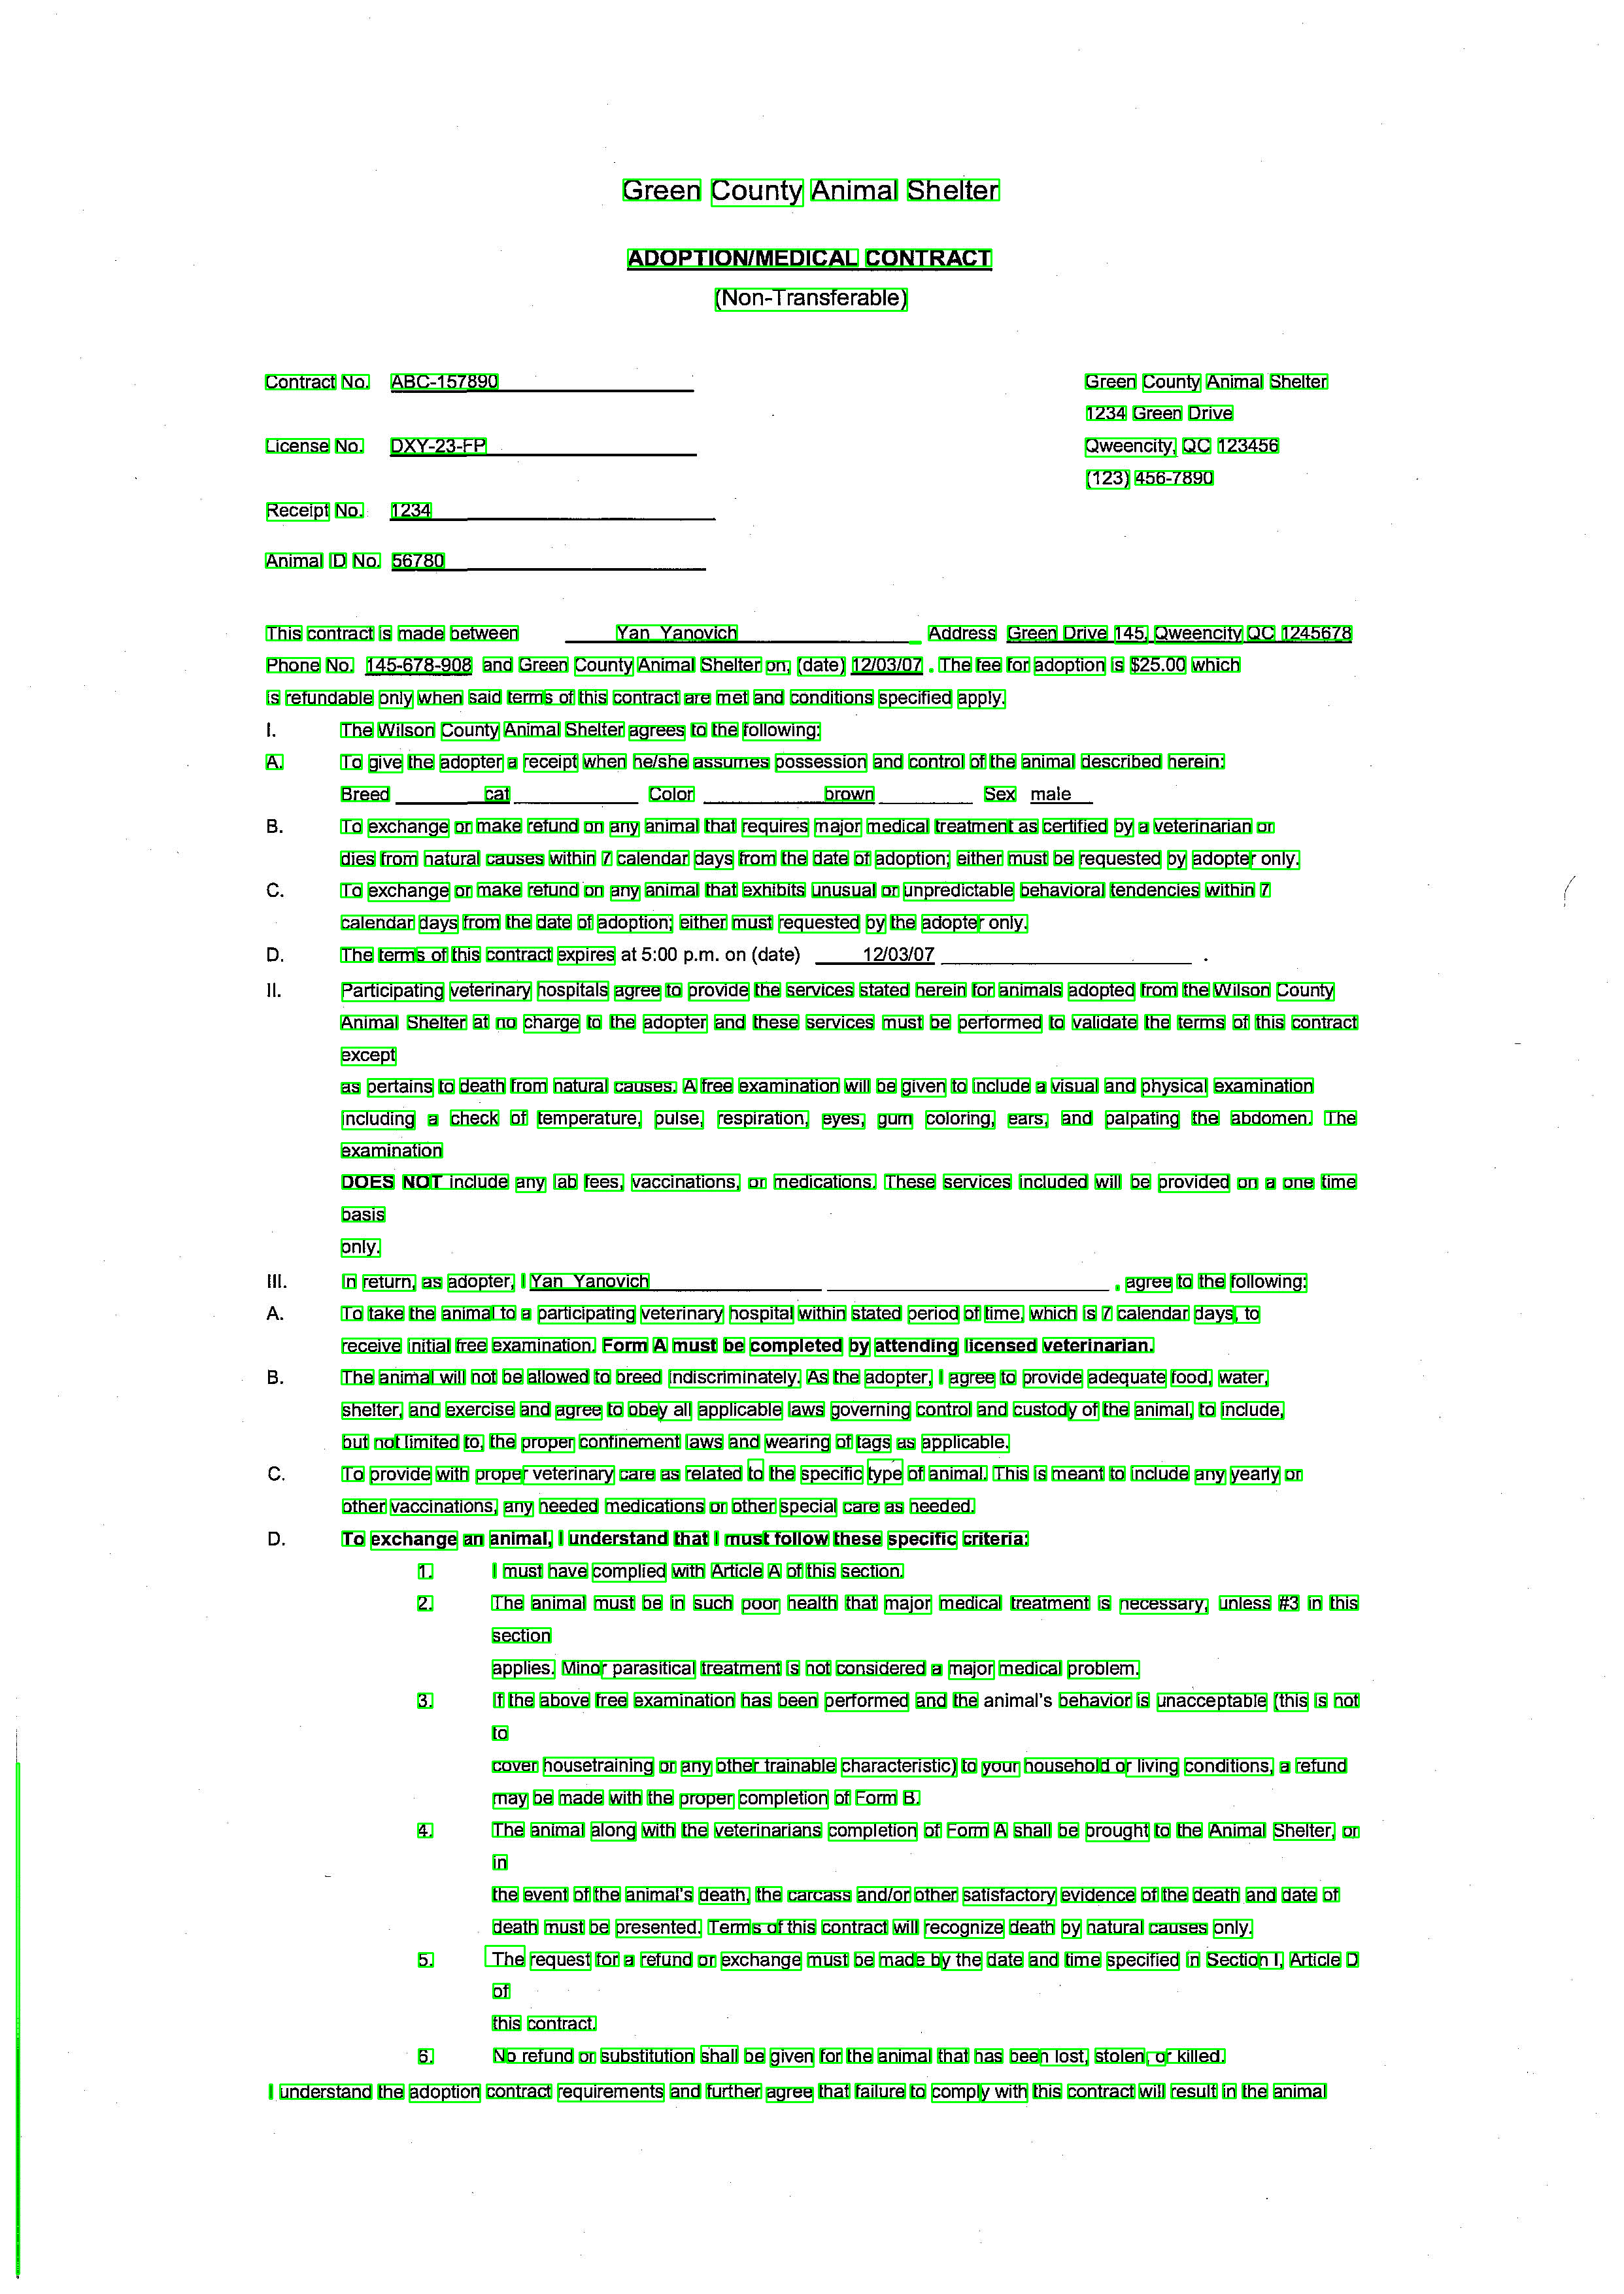

-1

In [ ]:
n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2_imshow(img)
cv2.waitKey(0)

# Get string output



In [ ]:
custom_config = r'-l eng --psm 6'
text = pytesseract.image_to_string(grayscale, config=custom_config)
print(text)

Green County Animal Shelter
ADOPTION/MEDICAL CONTRACT
(Non-Transferable)
Contract No. ABC-157890 Green County Animal Shelter
: 1234 Green Drive
License No. DXY-23-FP. Qweencity, QC 123456
“ (123) 456-7890 .

Receipt No.. 1234

Animal ID No. 56780

This contract is made between Yan_Yanovich _ Address Green Drive 145, Qweencity QC 1245678

Phone No. 145-678-908 and Green County Animal Shelter on, (date) 12/03/07 . The fee for adoption is $25.00 which

is refundable only when said terms of this contract are met and conditions specified apply.

I. The Wilson County Animal Shelter agrees to the following:

A. To give the adopter a receipt when he/she assumes possession and control of the animal described herein:

Breed cat Color brown Sex male _
B. To exchange or make refund on any animal that requires major medical treatment as certified by a veterinarian or
. dies from natural causes within 7 calendar days from the date of adoption; either must be requested by adopter only.

Cc. To exchan

# Checking word frequencies
- use NLTK word tokenize


In [ ]:
import nltk
from nltk import word_tokenize
nltk.download('punkt')

from nltk import ngrams, FreqDist

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
words = word_tokenize(text)
print(len(words), "words:", words)

749 words: ['Green', 'County', 'Animal', 'Shelter', 'ADOPTION/MEDICAL', 'CONTRACT', '(', 'Non-Transferable', ')', 'Contract', 'No', '.', 'ABC-157890', 'Green', 'County', 'Animal', 'Shelter', ':', '1234', 'Green', 'Drive', 'License', 'No', '.', 'DXY-23-FP', '.', 'Qweencity', ',', 'QC', '123456', '“', '(', '123', ')', '456-7890', '.', 'Receipt', 'No..', '1234', 'Animal', 'ID', 'No', '.', '56780', 'This', 'contract', 'is', 'made', 'between', 'Yan_Yanovich', '_', 'Address', 'Green', 'Drive', '145', ',', 'Qweencity', 'QC', '1245678', 'Phone', 'No', '.', '145-678-908', 'and', 'Green', 'County', 'Animal', 'Shelter', 'on', ',', '(', 'date', ')', '12/03/07', '.', 'The', 'fee', 'for', 'adoption', 'is', '$', '25.00', 'which', 'is', 'refundable', 'only', 'when', 'said', 'terms', 'of', 'this', 'contract', 'are', 'met', 'and', 'conditions', 'specified', 'apply', '.', 'I', '.', 'The', 'Wilson', 'County', 'Animal', 'Shelter', 'agrees', 'to', 'the', 'following', ':', 'A', '.', 'To', 'give', 'the', 'ado

In [ ]:
# compute the frequency distribution 
mp_freqdist = FreqDist(words) 
mp_freqdist.most_common(25) # show the top 25 (word,frequency) pairs

[('.', 44),
 (',', 32),
 ('the', 30),
 ('to', 20),
 ('of', 19),
 ('and', 14),
 ('animal', 14),
 ('or', 13),
 ('be', 12),
 ('is', 9),
 ('this', 9),
 ('a', 9),
 ('must', 9),
 ('contract', 8),
 ('The', 8),
 ('Animal', 7),
 ('Shelter', 6),
 (':', 6),
 ('date', 6),
 ('A', 6),
 ('To', 6),
 ('adopter', 6),
 ('any', 6),
 ('that', 6),
 ('as', 6)]

In [ ]:
# next steps: clean up capitalization, punctuation, get bigrams and trigrams, working with new datatypes
# research approximate string matching
# filter with dates as well


# Clean data before calculating Frequencies

In [ ]:
# remove capitalization

updated_text = [word.lower() for word in words] 
print(updated_text[0:100])

['green', 'county', 'animal', 'shelter', 'adoption/medical', 'contract', '(', 'non-transferable', ')', 'contract', 'no', '.', 'abc-157890', 'green', 'county', 'animal', 'shelter', ':', '1234', 'green', 'drive', 'license', 'no', '.', 'dxy-23-fp', '.', 'qweencity', ',', 'qc', '123456', '“', '(', '123', ')', '456-7890', '.', 'receipt', 'no..', '1234', 'animal', 'id', 'no', '.', '56780', 'this', 'contract', 'is', 'made', 'between', 'yan_yanovich', '_', 'address', 'green', 'drive', '145', ',', 'qweencity', 'qc', '1245678', 'phone', 'no', '.', '145-678-908', 'and', 'green', 'county', 'animal', 'shelter', 'on', ',', '(', 'date', ')', '12/03/07', '.', 'the', 'fee', 'for', 'adoption', 'is', '$', '25.00', 'which', 'is', 'refundable', 'only', 'when', 'said', 'terms', 'of', 'this', 'contract', 'are', 'met', 'and', 'conditions', 'specified', 'apply', '.', 'i']


In [ ]:
# remove punctuation

final_text = [x for x in updated_text if x.isalpha()]

print(final_text[0:100])


['green', 'county', 'animal', 'shelter', 'contract', 'contract', 'no', 'green', 'county', 'animal', 'shelter', 'green', 'drive', 'license', 'no', 'qweencity', 'qc', 'receipt', 'animal', 'id', 'no', 'this', 'contract', 'is', 'made', 'between', 'address', 'green', 'drive', 'qweencity', 'qc', 'phone', 'no', 'and', 'green', 'county', 'animal', 'shelter', 'on', 'date', 'the', 'fee', 'for', 'adoption', 'is', 'which', 'is', 'refundable', 'only', 'when', 'said', 'terms', 'of', 'this', 'contract', 'are', 'met', 'and', 'conditions', 'specified', 'apply', 'i', 'the', 'wilson', 'county', 'animal', 'shelter', 'agrees', 'to', 'the', 'following', 'a', 'to', 'give', 'the', 'adopter', 'a', 'receipt', 'when', 'assumes', 'possession', 'and', 'control', 'of', 'the', 'animal', 'described', 'herein', 'breed', 'cat', 'color', 'brown', 'sex', 'male', 'b', 'to', 'exchange', 'or', 'make', 'refund']


In [ ]:
# Check frequencies now

mp_freqdist = FreqDist(final_text)  
mp_freqdist.most_common(25)

[('the', 38),
 ('to', 26),
 ('animal', 21),
 ('of', 19),
 ('a', 15),
 ('and', 14),
 ('or', 13),
 ('be', 12),
 ('this', 11),
 ('contract', 10),
 ('is', 9),
 ('must', 9),
 ('shelter', 7),
 ('as', 7),
 ('no', 6),
 ('date', 6),
 ('adopter', 6),
 ('any', 6),
 ('that', 6),
 ('by', 6),
 ('in', 6),
 ('green', 5),
 ('county', 5),
 ('on', 5),
 ('only', 5)]